Video

16 Nov 2023 Tutorial

[Project Seaborn] 00:55:22-01:13:40 (20minutes)

https://cuhk.zoom.us/rec/share/2IsZm_sFlHXKWRT_wcz4hTa-8n4Rzdv39hfEse2TMEjWE9Ku0Sv3oF4Qa4VMQlc.rUvAOryy0KqBf93I

Passcode: 6#4F$8eT

Material: Advanced Python


---



# Project Seaborn

**Exercise**
1. Aggregate the sum of sales per week
2. Rearrange the values in 2D: x = week, y = year
3. Layout the values in a Heatmap

We want a final result like this:
- color represents the sales of that week
- Remember to adjust the size of the plot


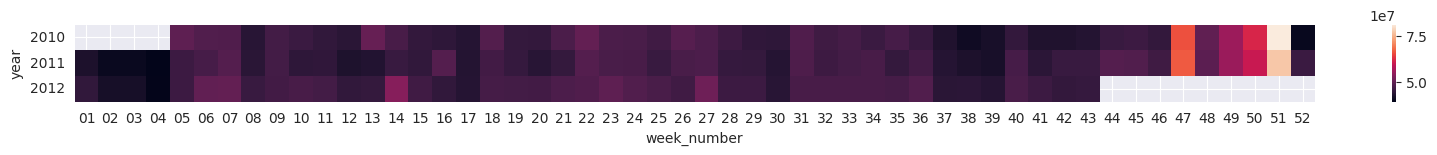

In [ ]:
import pandas as pd
df5 = pd.read_csv("https://drive.google.com/u/1/uc?id=1kbCDXONvf8Bn4kEW1ssmxdJLDHC-oV-E&export=download")
#ok

In [ ]:
df5.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
#transform the date columns to datetime
df5['Date_dt']=pd.to_datetime(df5['Date'],format="%d/%m/%Y")
df5.head()
#ok

,Store,Dept,Date,Weekly_Sales,IsHoliday,Date_dt
0,1,1,05/02/2010,24924.50,False,2010-02-05
1,1,1,12/02/2010,46039.49,True,2010-02-12
2,1,1,19/02/2010,41595.55,False,2010-02-19
3,1,1,26/02/2010,19403.54,False,2010-02-26
4,1,1,05/03/2010,21827.90,False,2010-03-05


In [ ]:
#Group by the week

week_vs_sales = df5.groupby('Date_dt')['Weekly_Sales'].sum().reset_index()
week_vs_sales

,Date_dt,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [ ]:
# ANS Step 3: Extract the week_number

week_vs_sales['week_number'] = week_vs_sales['Date_dt'].apply(lambda v: v.strftime("%U")) # Week number
week_vs_sales['year'] = week_vs_sales['Date_dt'].apply(lambda v: v.strftime("%Y")) # Year
week_vs_sales

,Date_dt,Weekly_Sales,week_number,year
0,2010-02-05,49750740.50,05,2010
1,2010-02-12,48336677.63,06,2010
2,2010-02-19,48276993.78,07,2010
3,2010-02-26,43968571.13,08,2010
4,2010-03-05,46871470.30,09,2010
...,...,...,...,...
138,2012-09-28,43734899.40,39,2012
139,2012-10-05,47566639.31,40,2012
140,2012-10-12,46128514.25,41,2012
141,2012-10-19,45122410.57,42,2012


In [ ]:
# ANS Step 4: Create a pivot table, ready to send to heatmap

pivoted = week_vs_sales.pivot(index="year", columns="week_number", values="Weekly_Sales")
pivoted

week_number,01,02,03,04,05,06,07,08,09,10,...,43,44,45,46,47,48,49,50,51,52
year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,49750740.50,48336677.63,48276993.78,43968571.13,46871470.30,45925396.51,...,43602830.95,45781981.89,46124800.83,45125584.18,65821003.24,49909027.88,55666770.39,61820799.85,80931415.60,40432519.00
2011,42775787.77,40673678.04,40654648.03,39599852.99,46153111.12,47336192.79,48716164.12,44125859.84,46980603.74,44627319.40,...,45855821.05,48655544.30,48474224.75,46438980.56,66593605.26,49390556.49,55561147.70,60085695.94,76998241.31,46042461.04
2012,44955421.95,42023078.48,42080996.56,39834974.67,46085608.09,50009407.92,50197056.96,45771506.57,46861034.97,47480454.11,...,45544116.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='week_number', ylabel='year'>

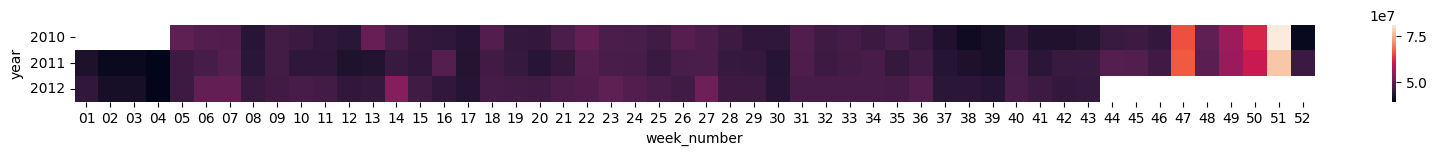

In [21]:
# ANS Step 5: Plot it on a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 1)) #set size of heatmap

import seaborn as sns
sns.heatmap(pivoted)
